# REFERENCES: 
Dataset taken from:- RiceFarms--> https://vincentarelbundock.github.io/Rdatasets/datasets.html
Modelling reference: http://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder 
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import statsmodels.formula.api as smf
from sklearn import linear_model

In [2]:
#Reading the data into dataframe
rice_data= pd.read_csv('Rice_data.csv')

# EXPLORATORY DATA ANALYSIS

In [3]:
#glimpse of the data
rice_data.head()

,Unnamed: 0,id,size,status,varieties,bimas,seed,urea,phosphate,pesticide,...,purea,pphosph,hiredlabor,famlabor,totlabor,wage,goutput,noutput,price,region
0,1,101001,3.000,owner,mixed,mixed,90,900,80,6000,...,75.0,75.0,2875,40,2915,68.49,7980,6800,60.0,wargabinangun
1,2,101001,2.000,owner,trad,mixed,40,600,0,3000,...,75.0,75.0,2110,45,2155,60.09,4083,3500,60.0,wargabinangun
2,3,101001,1.000,owner,high,mixed,100,700,150,5000,...,70.0,70.0,980,95,1075,51.99,2650,2242,65.0,wargabinangun
3,4,101001,2.000,owner,high,mixed,60,600,100,5000,...,70.0,70.0,2081,10,2091,56.98,4500,3750,70.0,wargabinangun
4,5,101001,3.572,share,high,no,105,400,400,10200,...,80.0,80.0,3889,1,3889,152.03,16300,13584,120.0,wargabinangun


In [4]:
#description of the data
rice_data.describe()

,Unnamed: 0,id,size,seed,urea,phosphate,pesticide,pseed,purea,pphosph,hiredlabor,famlabor,totlabor,wage,goutput,noutput,price
count,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000,1026.000000
mean,513.500000,374954.116959,0.431597,18.205653,95.440546,33.728070,595.004873,112.071598,78.979532,79.567739,237.023392,151.469786,388.447368,80.423275,1405.166667,1240.920078,90.961404
std,296.324991,164378.930505,0.546780,45.250820,127.149226,47.588061,2927.580992,64.279795,8.674188,9.271885,422.232593,148.115642,484.203777,42.188804,1921.756965,1638.983418,37.495010
min,1.000000,101001.000000,0.010000,1.000000,1.000000,0.000000,0.000000,40.000000,50.000000,60.000000,1.000000,1.000000,17.000000,30.000000,42.000000,42.000000,50.000000
25%,257.250000,209250.000000,0.143000,5.000000,25.000000,8.000000,0.000000,70.000000,70.000000,70.000000,36.000000,69.000000,144.000000,49.375000,420.000000,380.000000,60.500000
50%,513.500000,401037.000000,0.286000,10.000000,60.000000,20.000000,0.000000,81.000000,80.000000,80.000000,112.000000,111.000000,252.000000,57.140000,886.500000,800.000000,75.000000
75%,769.750000,504162.000000,0.500000,20.000000,100.000000,50.000000,265.000000,150.000000,85.000000,85.000000,260.000000,185.000000,435.000000,128.750000,1606.000000,1443.750000,120.000000
max,1026.000000,609245.000000,5.322000,1250.000000,1250.000000,700.000000,62600.000000,375.000000,100.000000,120.000000,4536.000000,1526.000000,4774.000000,175.350000,20960.000000,17610.000000,190.000000


In [5]:
#to get summary of data with datatypes
rice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 21 columns):
Unnamed: 0    1026 non-null int64
id            1026 non-null int64
size          1026 non-null float64
status        1026 non-null object
varieties     1026 non-null object
bimas         1026 non-null object
seed          1026 non-null int64
urea          1026 non-null int64
phosphate     1026 non-null int64
pesticide     1026 non-null int64
pseed         1026 non-null float64
purea         1026 non-null float64
pphosph       1026 non-null float64
hiredlabor    1026 non-null int64
famlabor      1026 non-null int64
totlabor      1026 non-null int64
wage          1026 non-null float64
goutput       1026 non-null int64
noutput       1026 non-null int64
price         1026 non-null float64
region        1026 non-null object
dtypes: float64(6), int64(11), object(4)
memory usage: 168.4+ KB


In [6]:
#checking for columns which have NULL values
null_columns=rice_data.columns[rice_data.isnull().any()]
null_columns

Index([], dtype='object')

Checking values of categorical variables

In [7]:
rice_data.varieties.value_counts()

trad     682
high     294
mixed     50
Name: varieties, dtype: int64

In [8]:
rice_data.status.value_counts()

owner    736
mixed    211
share     79
Name: status, dtype: int64

In [9]:
rice_data.bimas.value_counts()

no       779
mixed    162
yes       85
Name: bimas, dtype: int64

In [10]:
rice_data.region.value_counts()

gunungwangi      222
ciwangi          216
malausma         198
langan           144
sukaambit        132
wargabinangun    114
Name: region, dtype: int64

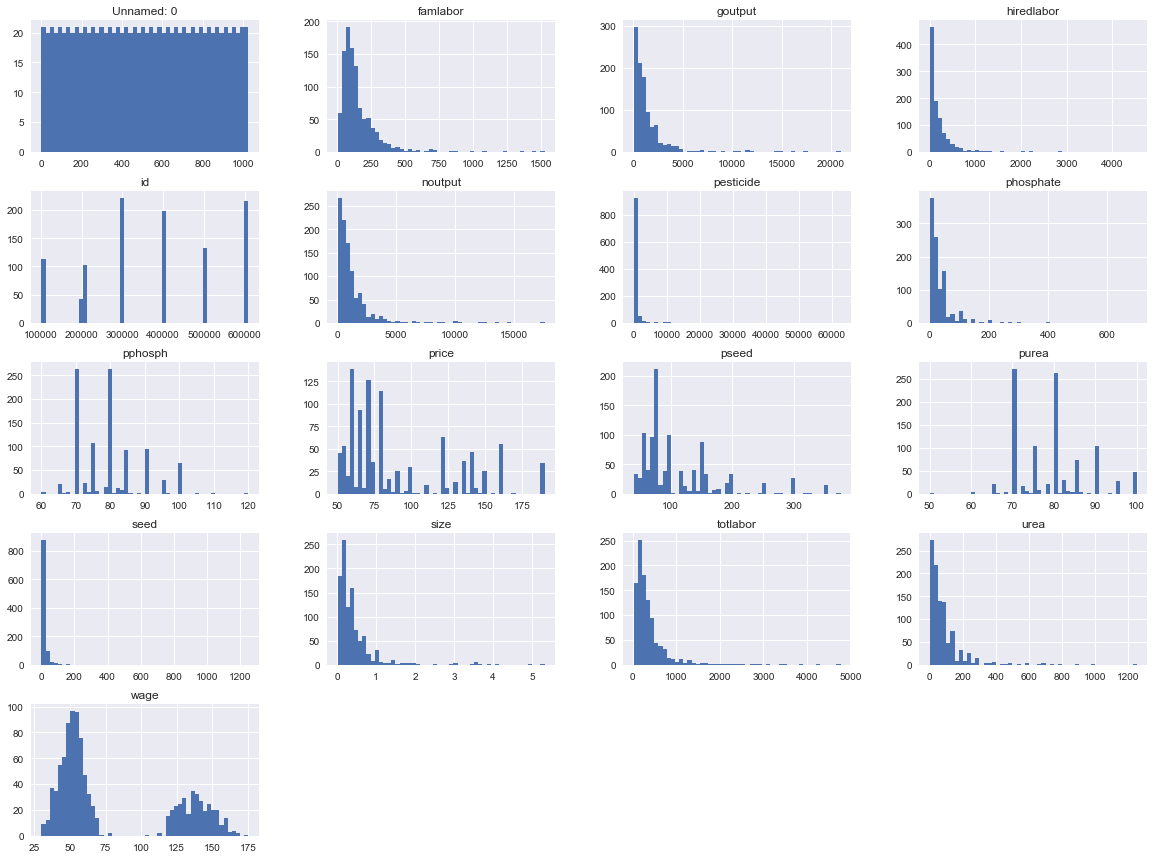

In [11]:
%matplotlib inline
rice_data.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
#varities has values ['mixed','trad','high'] which are transformed to [1,2,0] based on starting alphabet order
#converting other categorical variables too
obj_le = LabelEncoder()
rice_varieties=pd.DataFrame(obj_le.fit_transform(rice_data['varieties']),columns=['varieties_num'])
status=pd.DataFrame(obj_le.fit_transform(rice_data['status']),columns=['status_num'])
bimas=pd.DataFrame(obj_le.fit_transform(rice_data['bimas']),columns=['bimas_num'])
region=pd.DataFrame(obj_le.fit_transform(rice_data['region']),columns=['region_num'])
rice_new=pd.concat([rice_data,rice_varieties,status,bimas,region], axis=1)

In [13]:
#Plotting correlation matrix without Model and Release Date columns
rice_new.drop(['Unnamed: 0','id'],axis=1).corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,size,seed,urea,phosphate,pesticide,pseed,purea,pphosph,hiredlabor,famlabor,totlabor,wage,goutput,noutput,price,varieties_num,status_num,bimas_num,region_num
size,1.0,0.61,0.85,0.6,0.26,0.048,-0.1,-0.11,0.89,0.43,0.91,0.022,0.9,0.89,-0.012,-0.23,-0.03,-0.1,0.0078
seed,0.61,1.0,0.62,0.37,0.11,0.018,-0.067,-0.066,0.5,0.26,0.51,-0.0036,0.55,0.55,-0.026,-0.16,0.00076,-0.089,0.033
urea,0.85,0.62,1.0,0.68,0.28,0.12,-0.036,-0.039,0.77,0.4,0.79,0.12,0.81,0.81,0.075,-0.22,-0.05,-0.064,0.018
phosphate,0.6,0.37,0.68,1.0,0.35,0.22,0.12,0.11,0.59,0.27,0.6,0.29,0.73,0.74,0.19,-0.15,-0.042,0.052,-0.012
pesticide,0.26,0.11,0.28,0.35,1.0,0.15,0.11,0.12,0.26,0.029,0.23,0.21,0.39,0.4,0.11,-0.15,0.021,0.065,0.0049
pseed,0.048,0.018,0.12,0.22,0.15,1.0,0.47,0.48,0.024,0.1,0.053,0.74,0.16,0.15,0.67,-0.35,0.1,0.22,0.1
purea,-0.1,-0.067,-0.036,0.12,0.11,0.47,1.0,0.97,-0.069,0.046,-0.047,0.75,0.023,0.03,0.68,-0.075,-0.018,0.19,-0.005
pphosph,-0.11,-0.066,-0.039,0.11,0.12,0.48,0.97,1.0,-0.073,0.046,-0.049,0.76,0.015,0.022,0.69,-0.068,-0.0058,0.19,-0.029
hiredlabor,0.89,0.5,0.77,0.59,0.26,0.024,-0.069,-0.073,1.0,0.27,0.96,0.02,0.85,0.85,-0.0033,-0.15,0.0086,-0.063,-0.03
famlabor,0.43,0.26,0.4,0.27,0.029,0.1,0.046,0.046,0.27,1.0,0.55,0.13,0.41,0.41,0.11,-0.066,-0.11,0.047,-0.068


In [14]:
#based on correlation coefficient it can be seen that SIZE has strong positive relation with almost all variables
#GOUTPUT and NOUTPUT has coefficient of 1, hence dropping GOUTPUT
#STATUS, VARITIES, BIMAS and REGION are dropped as they are trans,formed to numeric columns in the previous steps
rice_new.drop(['Unnamed: 0','id','size','goutput','status','varieties','bimas','region'],axis=1,inplace=True)
rice_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 17 columns):
seed             1026 non-null int64
urea             1026 non-null int64
phosphate        1026 non-null int64
pesticide        1026 non-null int64
pseed            1026 non-null float64
purea            1026 non-null float64
pphosph          1026 non-null float64
hiredlabor       1026 non-null int64
famlabor         1026 non-null int64
totlabor         1026 non-null int64
wage             1026 non-null float64
noutput          1026 non-null int64
price            1026 non-null float64
varieties_num    1026 non-null int64
status_num       1026 non-null int64
bimas_num        1026 non-null int64
region_num       1026 non-null int64
dtypes: float64(5), int64(12)
memory usage: 136.3 KB


# DATA VISUALIZATION

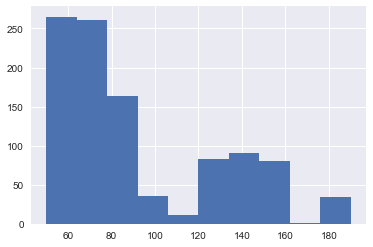

In [15]:
#histogram of price variable
rice_new['price'].hist()

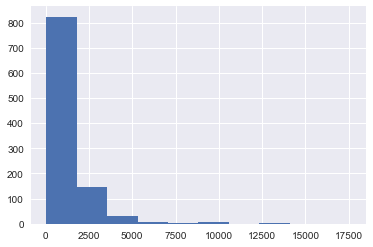

In [16]:
#histogram of price variable
rice_new['noutput'].hist()

(array([   2.,   33.,  118.,  177.,  219.,  247.,  145.,   59.,   14.,   12.]),
 array([ 3.73766962,  4.34152488,  4.94538013,  5.54923539,  6.15309065,
         6.75694591,  7.36080117,  7.96465643,  8.56851168,  9.17236694,
         9.7762222 ]),
 <a list of 10 Patch objects>)

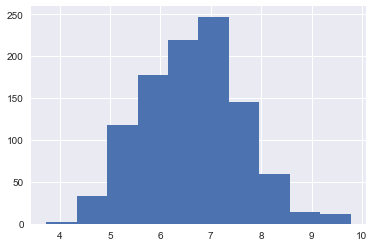

In [17]:
#histogram of log(price) variable to get the distribution by variable transformation
rice_arr=np.array(rice_new['noutput'])
lra=np.log(rice_arr)
plt.hist(lra)

FEATURE SELECTION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000292D47DB550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000292D4F54B00>]], dtype=object)

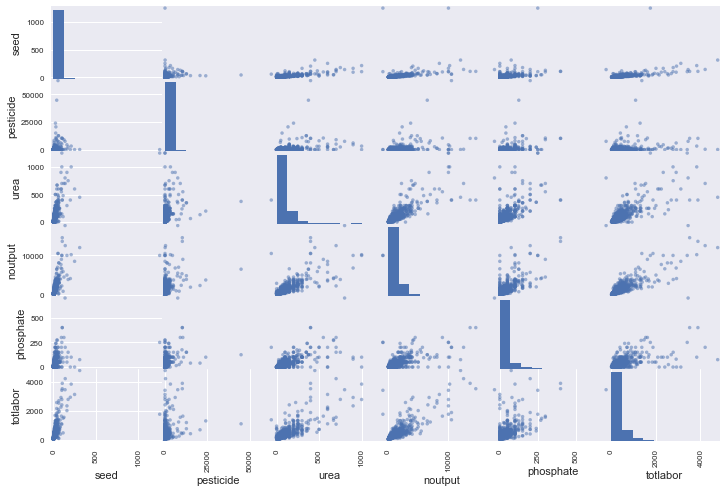

In [18]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
features = ['seed','pesticide','urea','noutput','phosphate','totlabor']
scatter_matrix(rice_new[features], figsize=(12, 8))

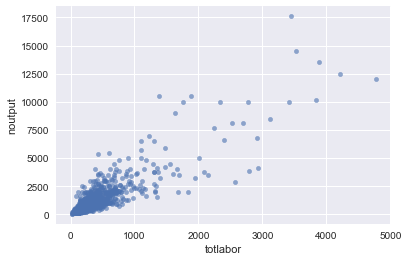

In [19]:
#Selecting TOTLABOR as independent variable and NOUTPUT as dependent variable to plot the relation
rice_new.plot(kind="scatter", x="totlabor", y="noutput",alpha=0.6)
plt.show()

# UNIVARIATE LINEAR REGRESSION

In [20]:
#Running linear regression on the all the values of dependent variable
lin_reg_full = linear_model.LinearRegression()
X = np.c_[rice_new["totlabor"]]
Y = np.c_[rice_new["noutput"]]
lin_reg_full.fit(X, Y)
p0, p1 = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
p0, p1#printing intercept and coefficient values

(99.492528230918879, 2.938435532158258)

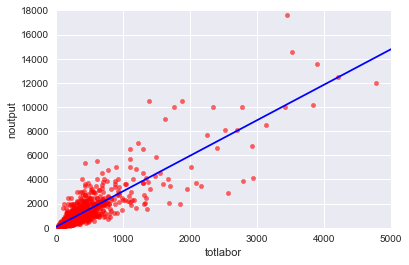

In [21]:
#Plot to demonstrate linear model
rice_new.plot(kind="scatter", x="totlabor", y="noutput",color="Red",alpha=0.6)
plt.axis([0, 5000, 0, 18000])
X=np.linspace(0, 18000, 5000)
plt.plot(X, p0 + p1*X, "b")
plt.show()

In [22]:
#Performing linear regression by splitting the data into train and test data
X1 = np.c_[rice_new["totlabor"]]
Y1 = np.c_[rice_new["noutput"]]
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y1,test_size=0.2) #splitting data in the ratio of 80:20
lin_reg1= linear_model.LinearRegression()
lin_reg1.fit(X_train,Y_train)
Y_pred = lin_reg1.predict(X_test)

In [23]:
#Calculating the MAE,MSE,RMSE,Intercept,Coefficient and Score to estmate goodness of fit of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print('Intercept:',lin_reg1.intercept_)
print('Coefficient:',lin_reg1.coef_)
print('Score:',lin_reg1.score(X_train,Y_train))
#model gives accuracy of 75%

Mean Absolute Error: 472.872985804
Mean Squared Error: 658126.054024
Root Mean Squared Error: 811.249686609
Intercept: [ 92.6358503]
Coefficient: [[ 2.96399607]]
Score: 0.726363817863


In [24]:
#Creating statistical model using statsmodel package
lin_reg2 = smf.ols(formula='noutput ~ totlabor', data=rice_new).fit()
# print the coefficients
print(lin_reg2.params)
print(lin_reg2.rsquared)

Intercept    99.492528
totlabor      2.938436
dtype: float64
0.75359769152


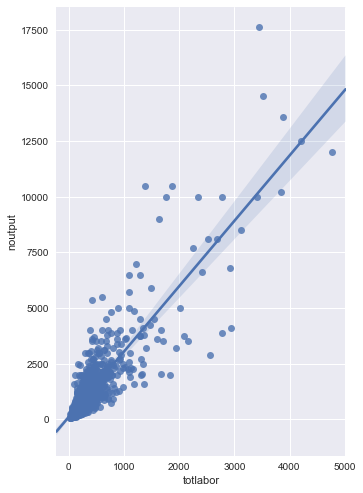

In [25]:
#plotting the linear model using seaborn package
sns.pairplot(rice_new, x_vars='totlabor', y_vars='noutput', size=7, aspect=0.7, kind='reg')

# MULTIVARIATE LINEAR REGRESSION

Using SKLEARN package

In [26]:
#create list of features to run the model on
feature_cols = ['totlabor','pesticide','urea','phosphate']
X2 = rice_new[feature_cols]
Y2 = rice_new.noutput

# instantiate and fit
lin_reg3 = linear_model.LinearRegression()
lin_reg3.fit(X2, Y2)

#coefficients and score of the model
print(lin_reg3.intercept_)
print(lin_reg3.coef_)
print(lin_reg3.score(X2,Y2))
#This model gives us better accuracy of 85% as compared to previous univariate model

-26.7655039983
[ 1.89264302  0.07448756  2.19469516  8.26344395]
0.853312628665


Using STATSMODEL package

In [27]:
#Using statsmodel
lin_reg4 = smf.ols(formula='noutput ~ totlabor+pesticide+urea+phosphate', data=rice_new).fit()
lin_reg4.rsquared
#This gives us same accuracy as the sklearn linear model

0.85331262866541158

# CONCLUSION
It can be seen that univariate model gives accuracy of 76% whereas multivariate model gives accuracy of 85%, hence making totallabor,pesticide used in kg, urea used in kg, phosphate used in kg better estimators of total output of rice produced in terms of kgs.